# Analyse, classification et indexation des données: feuille 7
### Réduction de dimension - Analyse en Composantes Principales (ACP)

In [58]:
import warnings
warnings.filterwarnings("ignore")

#### Avant de commencer

Ecrire une fonction <code> droite2DVd(x, vd, point) </code> permettant de calculer les ordonnées des points <code>(x, ?)</code> de la droite de vecteur directeur <code>vd</code> passant par le point <code>point</code>. Le paramètre <code>x</code> est un vecteur numpy, <code>vd</code> est un tuple <code>(a,b)</code>, <code>point</code> est un tuple <code>(xp, yp)</code>.
Testez votre fonction.

In [59]:
import numpy as np
def droite2DVd(x, vd, point):
    a = vd[1] / vd[0]
    b = point[1] - a * point[0]
    y = a * x + b
    return y


### Exercice 1.

Dans cet exercice, on considère le même dataset que pour le TD précédent (feuille 6). Nous avons un descripteur de taille 2 : chaque poisson est décrit par sa longueur et sa brillance. L'objectif de l'exercice est de passer d'un descripteur de taille 2 à un descripteur de taille 1.

Commencez par charger les données.


In [60]:
import pandas as pa
data = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter=';', header=0)
data = data.sample(frac=1)
X=data[['width','lightness']]
Y= data[['species']]

In [61]:
print(data)
print(X)
print(Y)

      lightness      width  species
472    4.678024   8.340371        0
977    6.636951   8.601069        0
906    3.633295   7.874983        0
1070  19.384220  12.937531        1
598    5.378858   6.904585        0
...         ...        ...      ...
293    7.386710   8.809881        0
878    1.927274   6.155747        0
65     6.035641   8.194551        0
1276  13.422553  11.653192        1
477    6.270218   6.515314        0

[1500 rows x 3 columns]
          width  lightness
472    8.340371   4.678024
977    8.601069   6.636951
906    7.874983   3.633295
1070  12.937531  19.384220
598    6.904585   5.378858
...         ...        ...
293    8.809881   7.386710
878    6.155747   1.927274
65     8.194551   6.035641
1276  11.653192  13.422553
477    6.515314   6.270218

[1500 rows x 2 columns]
      species
472         0
977         0
906         0
1070        1
598         0
...       ...
293         0
878         0
65          0
1276        1
477         0

[1500 rows x 1 columns]


1- Ecrire   une   fonction  <code>calculACP(echantillon, d=1)</code> qui réalise l'ACP sur un ensemble d'exemples. Chaque ligne de <code>echantillon</code> (DataFrame) contient les descripteurs associés à un exemple. La fonction retourne les <code>d</code> vecteurs propres calculés de plus grandes valeurs propres. Ils seront triés en fonction de leur valeur propre, de la plus grande à la plus petite. Tester la fonction sur le dataset.

In [62]:
def calculACP(echantillon, d=1):
    """
    Réalise l'Analyse en Composantes Principales (ACP) sur un ensemble d'exemples.

    Args:
        echantillon (DataFrame): Un DataFrame contenant les descripteurs associés à chaque exemple.
        d (int): Le nombre de vecteurs propres à retourner. Par défaut, 1.

    Returns:
        DataFrame: Un DataFrame contenant les d vecteurs propres calculés (triés par valeur propre, de la plus grande à la plus petite).
    """
    # Centrage des données
    nu = echantillon.mean()
    omega = echantillon.std()
    D = (echantillon - nu) / omega

    # Matrice de covariance
    #S=(len(echantillon)-1).D.conv()
    S = (D.T @ D) / (len(echantillon) - 1)

    # Calcul des valeurs propres et vecteurs propres
    lambda_, p = np.linalg.eig(S)

    # Trier les vecteurs propres en fonction des valeurs propres
    sorted_indices = np.argsort(lambda_)[::-1]
    W = p[:, sorted_indices[:d]]
    #W=p[np.argsort(lambda_)][::-1][:k].T

    # Projection des données sur les d vecteurs propres
    return D @ W


2- Ecrire une fonction <code>projection (W, echantillon)</code>  qui prend une matrice de
projection <code>W</code> et un échantillon et qui retourne la projection de cet
ensemble. 

In [63]:
def projection (W, echantillon):
    resultats_projection = echantillon @ W
    return resultats_projection

3- Visualiser le résultat de la réduction de dimension sur le dataset. Vous afficherez le nuage de points initial en 2D et la projection de ce nuage en 1D.

##### Avant la projection : 

Text(0, 0.5, 'Lightness')

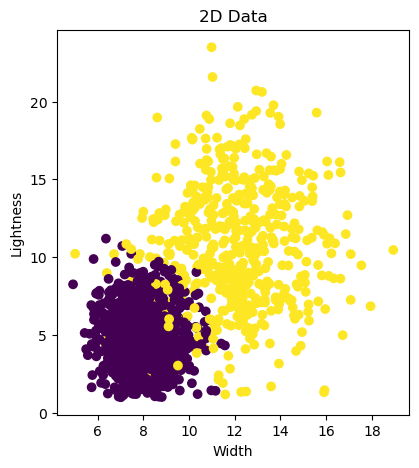

In [64]:
import matplotlib.pyplot as plt

# Create a scatter plot for the original 2D data
plt.figure(figsize=(10, 5))
plt.subplot(121)  # First subplot for 2D data

plt.scatter(X['width'], X['lightness'], c=Y['species'], cmap='viridis')
plt.title('2D Data')
plt.xlabel('Width')
plt.ylabel('Lightness')

#### Après la projection :

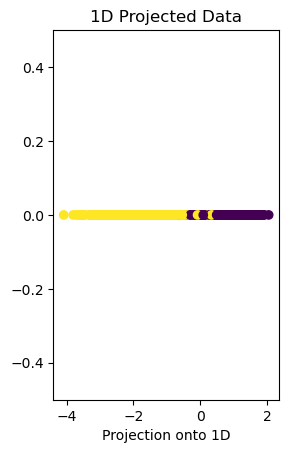

In [65]:
# Visualisation en 1D (projection)

reduced_data = calculACP(X, d=1)
plt.subplot(122)  # Second subplot for 1D projected data

plt.scatter(reduced_data, np.zeros_like(reduced_data), c=Y['species'], cmap='viridis')
plt.title('1D Projected Data')
plt.xlabel('Projection onto 1D')
plt.ylim(-0.5, 0.5)  # Set the y-axis range for 1D data

plt.show()

4- En utilisant un classifieur bayésien MAP, comparez les résultats obtenus avec l'échantillon brut (descripteur de dimension 2) et les résultats obtenus avec l'échantillon projeté sur l’axe de plus grande valeur propre (descripteur de dimension 1). Comparez également les temps d'entraînement.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import time

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [67]:
# Train and evaluate the classifier on the raw 2D data
start_time = time.time()
classifier_raw = MultinomialNB()
classifier_raw.fit(X_train, Y_train)
training_time_raw = time.time() - start_time
Y_pred_raw = classifier_raw.predict(X_test)
accuracy_raw = accuracy_score(Y_test, Y_pred_raw)
report_raw = classification_report(Y_test, Y_pred_raw)


In [70]:

# Train and evaluate the classifier on the 1D projected data
start_time = time.time()
classifier_projected = MultinomialNB()
classifier_projected.fit(reduced_data, Y_train)
training_time_projected = time.time() - start_time
Y_pred_projected = classifier_projected.predict(projection(reduced_data, X_test))
accuracy_projected = accuracy_score(Y_test, Y_pred_projected)
report_projected = classification_report(Y_test, Y_pred_projected)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [69]:

# Compare results
print("Classifier on raw 2D data:")
print(f"Training Time: {training_time_raw} seconds")
print(f"Accuracy: {accuracy_raw}")
print(report_raw)

print("\nClassifier on 1D projected data:")
print(f"Training Time: {training_time_projected} seconds")
print(f"Accuracy: {accuracy_projected}")
print(report_projected)


Classifier on raw 2D data:
Training Time: 0.00919795036315918 seconds
Accuracy: 0.7866666666666666
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       195
           1       0.94      0.42      0.58       105

    accuracy                           0.79       300
   macro avg       0.85      0.70      0.72       300
weighted avg       0.82      0.79      0.76       300


Classifier on 1D projected data:


NameError: name 'training_time_projected' is not defined

5- Même question avec un $k$-nn.

### Exercice 2.

Dans cet exercice, nous allons travailler avec un dataset contenant des données sur le cancer du sein. Le dataset 
peut être chargé par l'instruction <code> load_breast_cancer</code> de la bibliothèque <code>sklearn.datasets</code>.

Commencer par charger les données, et les explorer.



1- Faites une ACP en utilisant le module <code>PCA</code> de la bibliothèque <code>sklearn.decomposition</code>.  

Attention : pensez à centrer et réduire vos données.

2- Affichez l'éboulie des valeurs propres et indiquer le nombre d'axes à retenir en utilisant le critère du coude. 

3- Combien d'axes faut-il retenir pour garder au moins 80% de la variance ?

4- En ne gardant que 3 axes,  étudier l'impact de la réduction sur la qualité d'un classifieur de votre choix. 

5- Commenter les résultats